##  Movie Recommender Systems
- A movie recommendation system is a type of application designed to suggest movies to users based on their preferences, behaviors, or interactions.
- It is widely used in platforms like Netflix, Amazon Prime, and YouTube to enhance user experience by personalizing content delivery.

### 1. Import required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix
from datetime import datetime
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

### 2. Data Collection

In [4]:
ratings_file='dataset/ratings.csv'
movies_file='dataset/movies.csv'

In [5]:
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

In [6]:
movies.shape

(9742, 3)

In [7]:
ratings.shape

(100836, 4)

In [8]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### 3. Exploratory Data Analysis (EDA)

## MOVIE GENRE

#### 3.1 Most popular genres of movie released

<BarContainer object of 19 artists>

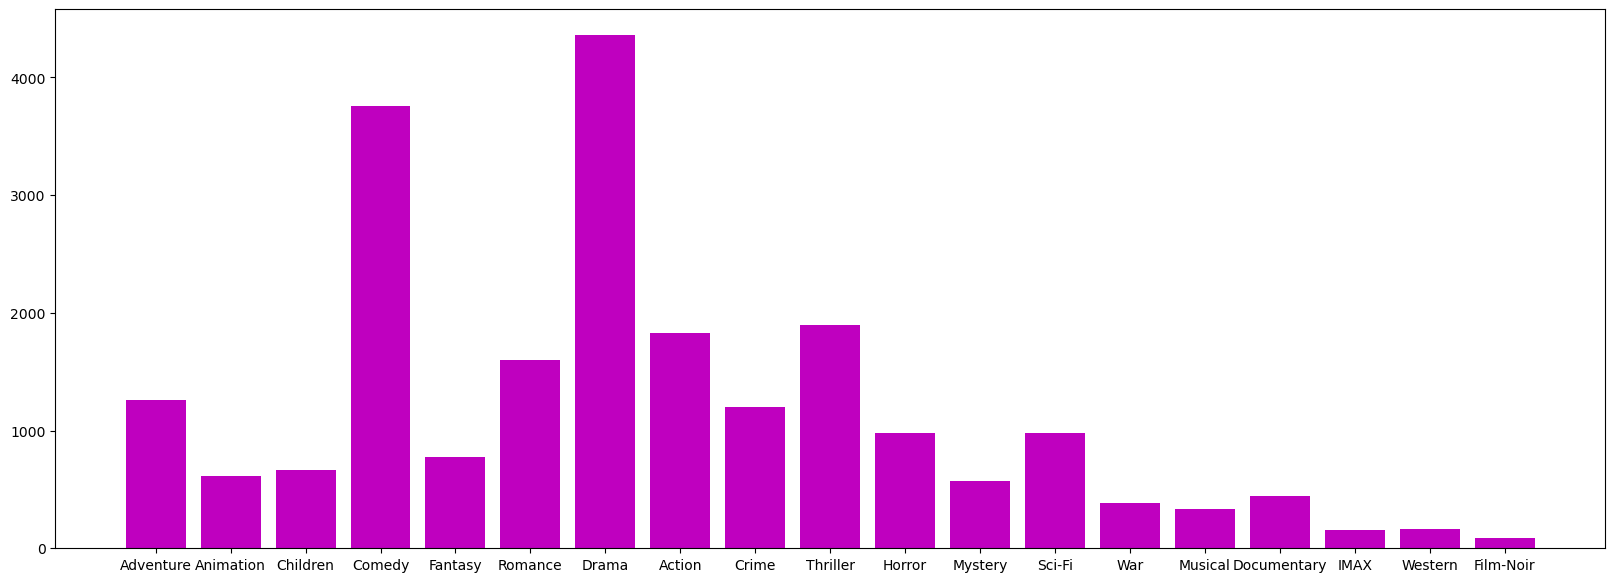

In [10]:
plt.figure(figsize=(20,7))
generlist = movies['genres'].apply(lambda generlist_movie : str(generlist_movie).split("|"))
geners_count = {}

for generlist_movie in generlist:
    for gener in generlist_movie:
        if(geners_count.get(gener,False)):
            geners_count[gener]=geners_count[gener]+1
        else:
            geners_count[gener] = 1       
geners_count.pop("(no genres listed)")
plt.bar(geners_count.keys(),geners_count.values(),color='m')

### Inference

The two genres that are mostly prominent are:
- Drama
- Comedy

#### 3.2 Distribution of users rating

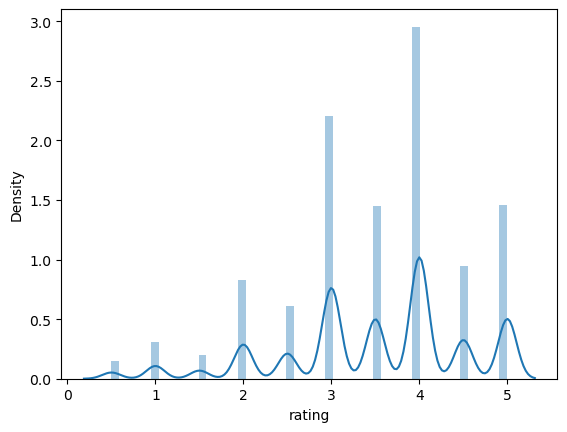

In [11]:
sns.distplot(ratings["rating"]);

### Inference

Rating 4 has been given by most users

#### 3.3 Distribution based on year

In [12]:
ratings_df=ratings.copy()
ratings_df['timestamp'] = ratings_df['timestamp'].apply(datetime.fromtimestamp)
ratings_df['year'] = ratings_df['timestamp'].dt.year
ratings_df['month'] = ratings_df['timestamp'].dt.month
ratings_df = ratings_df.sort_values('timestamp')
print('First 5:')
display(ratings_df.head())

First 5:


,userId,movieId,rating,timestamp,year,month
66719,429,595,5.0,1996-03-30 00:06:55,1996,3
66716,429,588,5.0,1996-03-30 00:06:55,1996,3
66717,429,590,5.0,1996-03-30 00:06:55,1996,3
66718,429,592,5.0,1996-03-30 00:06:55,1996,3
66712,429,432,3.0,1996-03-30 00:06:55,1996,3


,# of Ratings
year,
1996,6040
1997,1916
1998,507
1999,2439
2000,10061


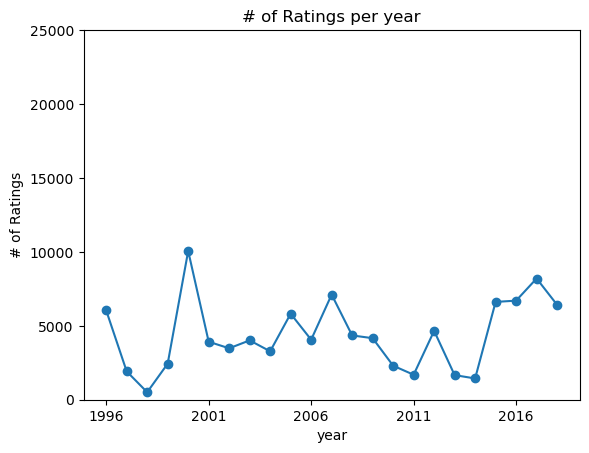

In [13]:
year_counts=ratings_df[['year','rating']].groupby(['year']).count()
year_counts = year_counts.rename(index=str, columns={'rating': '# of Ratings'})
year_counts = year_counts.reset_index()
year_counts = year_counts.set_index('year', drop=True)
display(year_counts[0:5])
year_counts['# of Ratings'].plot(style='o-')
plt.ylabel('# of Ratings')
plt.title('# of Ratings per year')
plt.ylim([0, 25000])
plt.gca().grid(which='minor')
plt.show()

## DATASET SIZE AND ITS VALUES

In [14]:
data = pd.pivot(index = 'movieId',columns = 'userId', data = ratings,values ='rating')
data.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
print("Shape of frames: \n"+ " Rating DataFrame"+ str(ratings.shape)+"\n Movies DataFrame"+ str(movies.shape))

Shape of frames: 
 Rating DataFrame(100836, 4)
 Movies DataFrame(9742, 3)


## MERGING THE 2 DATAFRAMES AND GROUPING THEM BY EITHER ONE TO PLOT GRAPHS

In [16]:
merge_ratings_movies = pd.merge(movies, ratings, on='movieId', how='inner')
merge_ratings_movies.head(2)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962


In [17]:
merge_ratings_movies = merge_ratings_movies.drop('timestamp', axis=1)
merge_ratings_movies.shape

(100836, 5)

In [18]:
ratings_grouped_by_users = merge_ratings_movies.groupby('userId').agg([np.size, np.mean])
ratings_grouped_by_users.head(2)

movieId               rating          
          size          mean   size      mean
userId                                       
1          232   1854.603448    232  4.366379
2           29  70350.275862     29  3.948276

<Axes: xlabel='userId'>

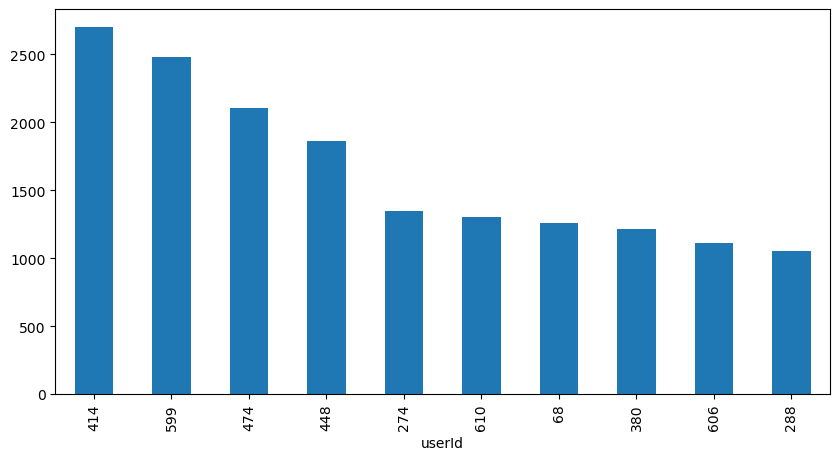

In [19]:
ratings_grouped_by_users['rating']['size'].sort_values(ascending=False).head(10).plot(kind='bar', figsize = (10,5))

### Movies with high average rating

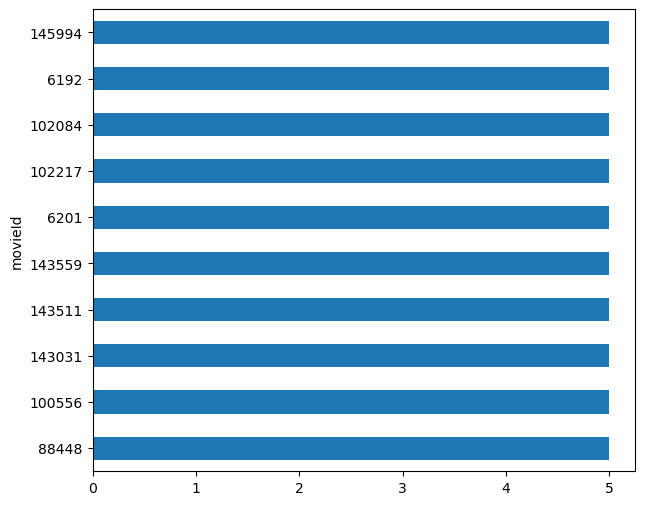

In [20]:
ratings_grouped_by_movies = merge_ratings_movies.groupby('movieId').agg([np.mean], np.size)
ratings_grouped_by_movies = ratings_grouped_by_movies.drop('userId', axis=1)
ratings_grouped_by_movies['rating']['mean'].sort_values(ascending=False).head(10).plot(kind='barh', figsize=(7,6));

### Movies with low average rating

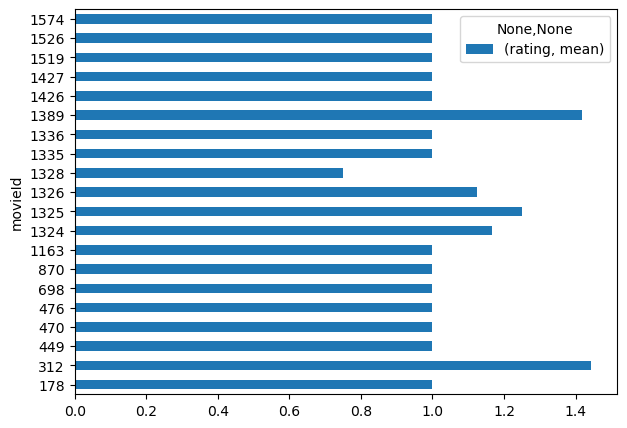

In [21]:
low_rated_movies_filter = ratings_grouped_by_movies['rating']['mean']< 1.5
low_rated_movies = ratings_grouped_by_movies[low_rated_movies_filter]
low_rated_movies.head(20).plot(kind='barh', figsize=(7,5));

### 4. Data Preprocessing

#### REMOVING NOISE 

In [22]:
numberOf_user_voted_for_movie = pd.DataFrame(ratings.groupby('movieId')['rating'].agg('count'))
numberOf_user_voted_for_movie.head()

,rating
movieId,
1,215
2,110
3,52
4,7
5,49


In [23]:
numberOf_movies_voted_by_user = pd.DataFrame(ratings.groupby('userId')['rating'].agg('count'))
numberOf_movies_voted_by_user.head()

,rating
userId,
1,232
2,29
3,39
4,216
5,44


In [24]:
data.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
data.fillna(0,inplace = True)
data.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


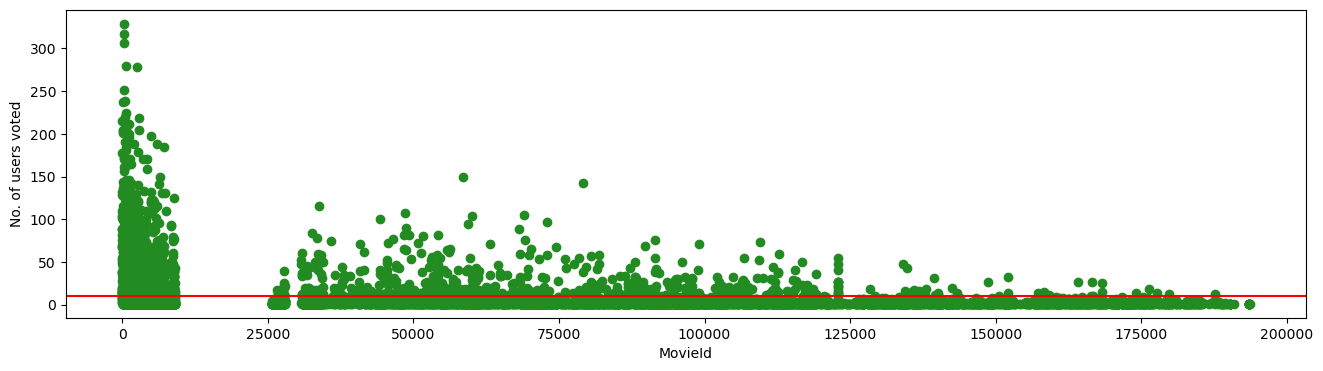

In [26]:
f, ax = plt.subplots(1,1, figsize=(16,4))
plt.scatter( numberOf_user_voted_for_movie.index,  numberOf_user_voted_for_movie, color='forestgreen')
plt.axhline(y=10, color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

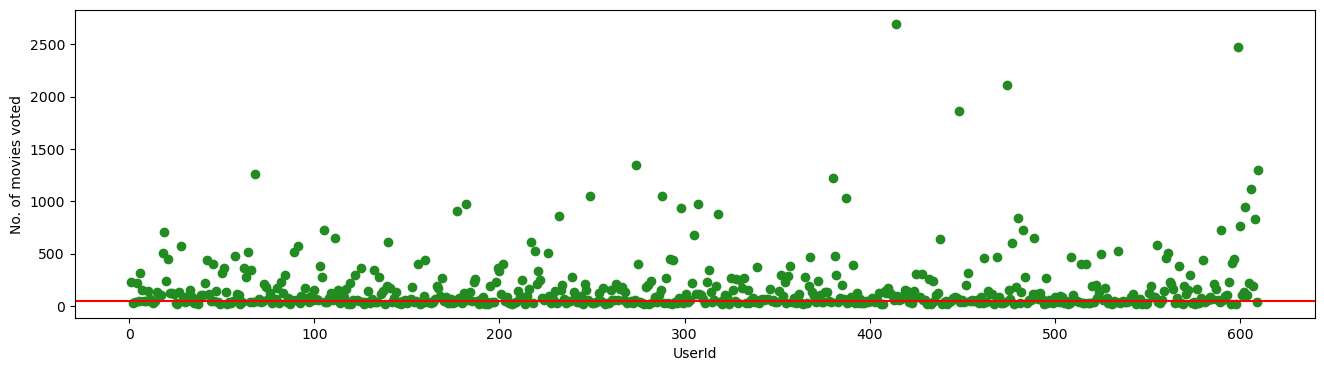

In [27]:
f, ax = plt.subplots(1,1, figsize=(16,4))
plt.scatter(numberOf_movies_voted_by_user.index, numberOf_movies_voted_by_user, color='forestgreen')
plt.axhline(y=50, color='r')
plt.xlabel('UserId')
plt.ylabel('No. of movies voted')
plt.show()

In [28]:
data_final = data.loc[numberOf_user_voted_for_movie[numberOf_user_voted_for_movie > 10].index,:]
data_final = data_final.loc[:, numberOf_movies_voted_by_user[numberOf_movies_voted_by_user >50].index]
data_final.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
data_final.shape

(9724, 610)

In [30]:
data.shape

(9724, 610)

#### REMOVING SPARSITY 

In [31]:
trial_sample = np.array([[0,0,3,0,0], [4,0,0,0,2], [0,0,0,0,1]])
sparsity = 1.0 - (np.count_nonzero(trial_sample) / float(trial_sample.size))
print(sparsity)

0.7333333333333334


In [32]:
csr_sample = csr_matrix(trial_sample)
print(csr_sample)

  (0, 2)	3
  (1, 0)	4
  (1, 4)	2
  (2, 4)	1


In [33]:
csr_data = csr_matrix(data_final.values)
data_final.reset_index(inplace=True)
data_final.head()

userId,movieId,1,2,3,4,5,6,7,8,9,...,601,602,603,604,605,606,607,608,609,610
0,1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
1,2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
2,3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


# 

## 5. Model Selection and Training

#### MODEL1 : USER-BASED COLLABORATIVE FILTERING 

In [34]:
#code

In [35]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Cleaning the title

In [36]:
import re

def clean_title(title):
    #replace any non word or number characters
    title = re.sub("[^a-zA-Z0-9 ]", "", title)
    return title


In [37]:
movies["clean_title"] = movies["title"].apply(clean_title)


In [38]:
movies


,movieId,title,genres,clean_title
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story 1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,Jumanji 1995
2,3,Grumpier Old Men (1995),Comedy|Romance,Grumpier Old Men 1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Waiting to Exhale 1995
4,5,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II 1995
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,Black Butler Book of the Atlantic 2017
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,No Game No Life Zero 2017
9739,193585,Flint (2017),Drama,Flint 2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,Bungo Stray Dogs Dead Apple 2018


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Term Frequency (TF) and Inverse Document Frequency (DF)
#Document frequency is the number of documents containing a specific term. Document frequency indicates how common the term is
#unigrams and bigrams
vectorizer = TfidfVectorizer(ngram_range=(1,2))

tfidf = vectorizer.fit_transform(movies["clean_title"])

In [40]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

#search term
def search(title):
    #cleaning the title
    title = clean_title(title)
    #turn serch term to vector
    query_vec = vectorizer.transform([title])
    #similarity between serach term and titles
    similarity = cosine_similarity(query_vec, tfidf).flatten()
    #5 most similiar titles
    indices = np.argpartition(similarity, -5)[-5:]
    #reverse result(most similiar is in the last)
    #index movie data acoording to indices
    results = movies.iloc[indices].iloc[::-1]
    
    return results
search("Toy Story")

,movieId,title,genres,clean_title
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story 1995
7355,78499,Toy Story 3 (2010),Adventure|Animation|Children|Comedy|Fantasy|IMAX,Toy Story 3 2010
2355,3114,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy,Toy Story 2 1999
3595,4929,"Toy, The (1982)",Comedy,Toy The 1982
4089,5843,Toy Soldiers (1991),Action|Drama,Toy Soldiers 1991


In [41]:
import ipywidgets as widgets
from IPython.display import display

movie_input = widgets.Text(
    value='Toy Story',
    description='Movie Title:',
    disabled=False
)
movie_list = widgets.Output()

def on_type(data):
    with movie_list:
        movie_list.clear_output()
        #new value of input
        title = data["new"]
        if len(title) > 5:
            display(search(title))
#call method on type
movie_input.observe(on_type, names='value')


display(movie_input, movie_list)

Text(value='Toy Story', description='Movie Title:')

Output()

In [42]:
movie_id = 89745

#def find_similar_movies(movie_id):
movie = movies[movies["movieId"] == movie_id]

In [43]:
#Using ratings
ratings = pd.read_csv("ratings.csv")

Considering similar users

In [44]:
#users who watched the movieid and greater than 5 rating(liked the same movie)
similar_users = ratings[(ratings["movieId"] == movie_id) & (ratings["rating"] > 4)]["userId"].unique()

In [45]:
#movies users who are similiar to us liked(other than provided)
similar_user_recs = ratings[(ratings["userId"].isin(similar_users)) & (ratings["rating"] > 4)]["movieId"]

In [46]:
#counts how many times each movie appears in dataset
#convert it to percentage
similar_user_recs = similar_user_recs.value_counts() / len(similar_users)
#movies greater than 10 percent liked
similar_user_recs = similar_user_recs[similar_user_recs > .10]

Considering all users

In [47]:
#all the users who have watched the movies in the set and have given it high ratings
all_users = ratings[(ratings["movieId"].isin(similar_user_recs.index)) & (ratings["rating"] > 4)]

In [48]:
#percentage of all users who liked the movies
all_user_recs = all_users["movieId"].value_counts() / len(all_users["userId"].unique())

In [49]:
#dataframe with all and similiar users
rec_percentages = pd.concat([similar_user_recs, all_user_recs], axis=1)
rec_percentages.columns = ["similar", "all"]

In [50]:
#prefer movies with a difference between similar and all
rec_percentages

,similar,all
89745,1.000000,0.045534
79132,0.615385,0.120841
2571,0.615385,0.262697
112852,0.576923,0.047285
58559,0.576923,0.138354
...,...,...
2951,0.115385,0.026270
1222,0.115385,0.075306
58998,0.115385,0.021016
1240,0.115385,0.057793


In [51]:
rec_percentages["score"] = rec_percentages["similar"] / rec_percentages["all"]

In [52]:
#sort in descending
#higher the score better the recommendation
rec_percentages = rec_percentages.sort_values("score", ascending=False)

In [53]:
#merge to get titles
#left index:movie id
rec_percentages.head(10).merge(movies, left_index=True, right_on="movieId")

,similar,all,score,movieId,title,genres,clean_title
8469,0.115385,0.005254,21.961538,112623,Dawn of the Planet of the Apes (2014),Sci-Fi,Dawn of the Planet of the Apes 2014
7850,0.115385,0.005254,21.961538,93721,Jiro Dreams of Sushi (2011),Documentary,Jiro Dreams of Sushi 2011
8301,0.192308,0.008757,21.961538,106642,"Day of the Doctor, The (2013)",Adventure|Drama|Sci-Fi,Day of the Doctor The 2013
8696,0.192308,0.008757,21.961538,122920,Captain America: Civil War (2016),Action|Sci-Fi|Thriller,Captain America Civil War 2016
7693,1.000000,0.045534,21.961538,89745,"Avengers, The (2012)",Action|Adventure|Sci-Fi|IMAX,Avengers The 2012
8151,0.230769,0.012259,18.824176,102125,Iron Man 3 (2013),Action|Sci-Fi|Thriller|IMAX,Iron Man 3 2013
8451,0.192308,0.010508,18.301282,112175,How to Train Your Dragon 2 (2014),Action|Adventure|Animation,How to Train Your Dragon 2 2014
8689,0.192308,0.010508,18.301282,122900,Ant-Man (2015),Action|Adventure|Sci-Fi,AntMan 2015
8395,0.307692,0.017513,17.569231,110102,Captain America: The Winter Soldier (2014),Action|Adventure|Sci-Fi|IMAX,Captain America The Winter Soldier 2014
8686,0.153846,0.008757,17.569231,122892,Avengers: Age of Ultron (2015),Action|Adventure|Sci-Fi,Avengers Age of Ultron 2015


Constructing the function,

In [54]:
def find_similar_movies(movie_id):
    similar_users = ratings[(ratings["movieId"] == movie_id) & (ratings["rating"] > 4)]["userId"].unique()
    similar_user_recs = ratings[(ratings["userId"].isin(similar_users)) & (ratings["rating"] > 4)]["movieId"]
    similar_user_recs = similar_user_recs.value_counts() / len(similar_users)

    similar_user_recs = similar_user_recs[similar_user_recs > .10]
    all_users = ratings[(ratings["movieId"].isin(similar_user_recs.index)) & (ratings["rating"] > 4)]
    all_user_recs = all_users["movieId"].value_counts() / len(all_users["userId"].unique())
    rec_percentages = pd.concat([similar_user_recs, all_user_recs], axis=1)
    rec_percentages.columns = ["similar", "all"]
    
    rec_percentages["score"] = rec_percentages["similar"] / rec_percentages["all"]
    rec_percentages = rec_percentages.sort_values("score", ascending=False)
    return rec_percentages.head(10).merge(movies, left_index=True, right_on="movieId")[["score", "title", "genres"]]

In [55]:
import ipywidgets as widgets
from IPython.display import display

movie_name_input = widgets.Text(
    value='Toy Story',
    description='Movie Title:',
    disabled=False
)
recommendation_list = widgets.Output()

def on_type(data):
    with recommendation_list:
        recommendation_list.clear_output()
        #title from input widget
        title = data["new"]
        if len(title) > 5:
            results = search(title)
            #highest result in forst row
            movie_id = results.iloc[0]["movieId"]
            display(find_similar_movies(movie_id))

movie_name_input.observe(on_type, names='value')

display(movie_name_input, recommendation_list)

Text(value='Toy Story', description='Movie Title:')

Output()

#### MODEL2 : KNN-BASED COLLABORATIVE FILTERING 

### (Model based approach) 

In [56]:
numberOf_user_voted_for_movie = pd.DataFrame(ratings.groupby('movieId')['rating'].agg('count'))
numberOf_user_voted_for_movie.reset_index(level = 0,inplace = True)
numberOf_user_voted_for_movie.head()

,movieId,rating
0,1,215
1,2,110
2,3,52
3,4,7
4,5,49


In [57]:
numberOf_movies_voted_by_user = pd.DataFrame(ratings.groupby('userId')['rating'].agg('count'))     
numberOf_movies_voted_by_user.reset_index(level = 0,inplace = True)
numberOf_movies_voted_by_user.head()

,userId,rating
0,1,232
1,2,29
2,3,39
3,4,216
4,5,44


In [58]:
#code
data_final1 = data.loc[numberOf_user_voted_for_movie[numberOf_user_voted_for_movie['rating'] > 10]['movieId'],:]
data_final1 = data_final1.loc[:,numberOf_movies_voted_by_user[numberOf_movies_voted_by_user['rating'] > 60]['userId']]
data_final1.shape

(2121, 334)

In [59]:
from scipy.sparse import csr_matrix
csr_data = csr_matrix(data_final1.values)
data_final1.reset_index(inplace=True)

In [60]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20)
knn.fit(csr_data)
def get_movie_recommendation(movie_name):
    n= 10
    movie_list = movies[movies['title'].str.contains(movie_name)]  
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['movieId'] #movieId
        movie_idx = data_final[data_final['movieId'] == movie_idx].index[0] #userId acc to movieId
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n+1)    
        #we are making a list of tuples containing (user_id,dist)
        rec_movie_indices = sorted(list(zip(indices.squeeze(),distances.squeeze())),key=lambda x: x[1])[1::1]
        recommend = []
        recommend2 = []
        for val in rec_movie_indices:
            movie_idx = data_final.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommend.append(movies.iloc[idx]['title'].values[0])
            recommend2.append(val[1])         
        df1 = pd.DataFrame(recommend)
        df2 = pd.DataFrame(recommend2)
        df = pd.concat([df1,df2],axis = 'columns')
        df.columns = ['Title','Distance']
        df.set_index('Distance',inplace = True)
        return df
    else:
        return "No movies found. Please check your input"

In [61]:
get_movie_recommendation("Toy Story")

,Title
Distance,
0.306580,Interview with the Vampire: The Vampire Chroni...
0.334422,Three Wishes (1995)
0.347906,Rob Roy (1995)
0.354764,"Preacher's Wife, The (1996)"
0.355391,"Postman, The (1997)"
0.360387,Big Bully (1996)
0.361993,RoboCop 3 (1993)
0.364585,Mad Love (1995)
0.371235,Free Willy 2: The Adventure Home (1995)


In [62]:
print("Enter the number of movies you would love to watch from the above list of recommendations")
p=int(input())
print("Enter the no of movies from the above list of recommendations that you would say is irrelevant to your taste")
ir=int(input())

precision=p/10
recall=p/(10-ir)
F_score=(2*precision*recall)/(precision+recall)
print("F_score:",F_score)

Enter the number of movies you would love to watch from the above list of recommendations
3
Enter the no of movies from the above list of recommendations that you would say is irrelevant to your taste
5
F_score: 0.4


### MODEL3 : SVD-BASED COLLABORATIVE FILTERING  

### (Model based approach) 

In [63]:
#specific preprocessing

In [64]:
data = pd.pivot(index = 'movieId',columns = 'userId', data = ratings,values ='rating')

numberOf_user_voted_for_movie = ratings.groupby('movieId')['rating'].agg('count')
numberOf_movies_voted_by_user = ratings.groupby('userId')['rating'].agg('count')
data.fillna(0,inplace = True)
data_final = data.loc[numberOf_user_voted_for_movie[numberOf_user_voted_for_movie > 10].index,:]
data_final = data_final.loc[:, numberOf_movies_voted_by_user[numberOf_movies_voted_by_user >50].index]

csr_data = csr_matrix(data_final.values)
data_final.reset_index(inplace=True)

In [65]:
#code

### Making the model

In [66]:
from sklearn.utils.extmath import randomized_svd

U, S, V = randomized_svd(csr_data, 
                              n_components=15,
                              n_iter=5,
                              random_state=42)

In [67]:
csr_data

<2121x378 sparse matrix of type '<class 'numpy.float64'>'
	with 72893 stored elements in Compressed Sparse Row format>

### Making the recommendation function

In [68]:
movie_data = pd.read_csv("movies.csv")
data = pd.read_csv("ratings.csv")

In [69]:
#Computing the Singular Value Decomposition (SVD)

#Function to calculate the cosine similarity (sorting by most similar and returning the top N)
def top_cosine_similarity(data, movie_id, top_n=10):
    index = movie_id - 1 # Movie id starts from 1 in the dataset
    movie_row = data[index, :]
    magnitude = np.sqrt(np.einsum('ij, ij -> i', data, data))
    similarity = np.dot(movie_row, data.T) / (magnitude[index] * magnitude)
    sort_indexes = np.argsort(-similarity)
    return sort_indexes[:top_n]

# Function to print top N similar movies
def print_similar_movies(movie_data, movie_id, top_indexes):
    print('Recommendations for {0}: \n'.format(
    movie_data[movie_data.movieId == movie_id].title.values))
    for id in top_indexes + 1:
        print((movie_data[movie_data.movieId == id].title.values)[0])

### Recommending

In [75]:
#k-principal components to represent movies, movie_id to find recommendations, top_n print n results        
k = 50
movie_id = 10 # (getting an id from movies.dat)
top_n = 10
sliced = V.T[:, :k] # representative data
indexes = top_cosine_similarity(sliced, movie_id, top_n)

#Printing the top N similar movies
print_similar_movies(movie_data, movie_id, indexes)

Recommendations for ['GoldenEye (1995)']: 

GoldenEye (1995)
It Takes Two (1995)
White Balloon, The (Badkonake sefid) (1995)
Drop Zone (1994)
Hunted, The (1995)
Once Were Warriors (1994)
Hoop Dreams (1994)
Pie in the Sky (1996)
Unzipped (1995)
Walk in the Clouds, A (1995)


## <Center>Thank You